In [6]:
import pandas as pd
import numpy as np
 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
len(df)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

C:\Users\E10112538\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


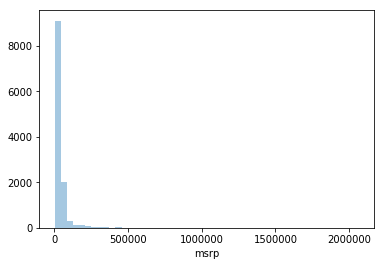

In [9]:
sns.distplot(df.msrp, kde=False)

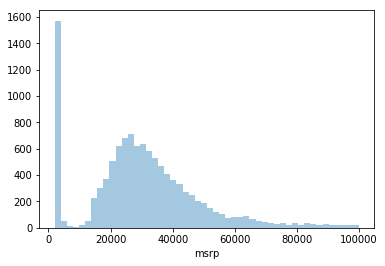

In [10]:
sns.distplot(df.msrp[df.msrp < 100000], kde=False)

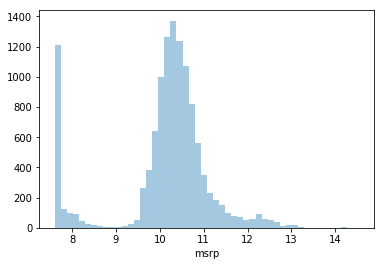

In [11]:
log_price = np.log1p(df.msrp)
sns.distplot(log_price, kde=False)

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [13]:
n = len(df)
 
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
 
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
 
df_shuffled = df.iloc[idx]
 
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [15]:
import boto3
client = boto3.client('comprehend')

In [58]:
response = client.detect_sentiment(
    Text="""
 " quest for camelot " is warner bros . ' first feature-length , fully-animated attempt to steal clout from disney's cartoon empire , but the mouse has no reason to be worried . 
the only other recent challenger to their throne was last fall's promising , if flawed , 20th century fox production " anastasia , " but disney's " hercules , " with its lively cast and colorful palate , had her beat hands-down when it came time to crown 1997's best piece of animation . 
this year , it's no contest , as " quest for camelot " is pretty much dead on arrival . 
even the magic kingdom at its most mediocre -- that'd be " pocahontas " for those of you keeping score -- isn't nearly as dull as this . 
the story revolves around the adventures of free-spirited kayley ( voiced by jessalyn gilsig ) , the early-teen daughter of a belated knight from king arthur's round table . 
kayley's only dream is to follow in her father's footsteps , and she gets her chance when evil warlord ruber ( gary oldman ) , an ex-round table member-gone-bad , steals arthur's magical sword excalibur and accidentally loses it in a dangerous , booby-trapped forest . 
with the help of hunky , blind timberland-dweller garrett ( carey elwes ) and a two-headed dragon ( eric idle and don rickles ) that's always arguing with itself , kayley just might be able to break the medieval sexist mold and prove her worth as a fighter on arthur's side . 
 " quest for camelot " is missing pure showmanship , an essential element if it's ever expected to climb to the high ranks of disney . 
there's nothing here that differentiates " quest " from something you'd see on any given saturday morning cartoon -- subpar animation , instantly forgettable songs , poorly-integrated computerized footage . 
 ( compare kayley and garrett's run-in with the angry ogre to herc's battle with the hydra . 
i rest my case . ) 
even the characters stink -- none of them are remotely interesting , so much that the film becomes a race to see which one can out-bland the others . 
in the end , it's a tie -- they all win . 
that dragon's comedy shtick is awfully cloying , but at least it shows signs of a pulse . 
at least fans of the early-'90s tgif television line-up will be thrilled to find jaleel " urkel " white and bronson " balki " pinchot sharing the same footage . 
a few scenes are nicely realized ( though i'm at a loss to recall enough to be specific ) , and the actors providing the voice talent are enthusiastic ( though most are paired up with singers who don't sound a thing like them for their big musical moments -- jane seymour and celine dion ? ? ? ) . 
but one must strain through too much of this mess to find the good . 
aside from the fact that children will probably be as bored watching this as adults , " quest for camelot " 's most grievous error is its complete lack of personality . 
and personality , we learn from this mess , goes a very long way 
    """,
    LanguageCode='en'
)
response

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.7988418340682983,
  'Negative': 0.0056368643417954445,
  'Neutral': 0.19549833238124847,
  'Mixed': 2.2944983356865123e-05},
 'ResponseMetadata': {'RequestId': 'e7c183c4-53ea-4433-96d8-f724ea787092',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'e7c183c4-53ea-4433-96d8-f724ea787092',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '166',
   'date': 'Wed, 22 Jul 2020 10:13:56 GMT'},
  'RetryAttempts': 0}}

In [54]:
sentiment = response['Sentiment']

if sentiment == 'POSITIVE':
    res = 'pos'
elif sentiment == 'NEGATIVE ':
    res = 'neg'
else:
    positive = response['SentimentScore']['Positive']
    negative = response['SentimentScore']['Negative']
    if positive >= negative:
        res = 'pos'
    else:
        res = 'neg'
        

    
res

'pos'